# Excercise 1

In the tutorial you saw how to compute LDA for a two class problem. In this excercise we will work on a multi-class problem. We will be working with the famous Iris dataset that has been deposited on the UCI machine learning repository
(https://archive.ics.uci.edu/ml/datasets/Iris).

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:
1. Iris-setosa (n=50)
2. Iris-versicolor (n=50)
3. Iris-virginica (n=50)

The four features of the Iris dataset:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

<img src="iris_petal_sepal.png">



In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set();
import pandas as pd
from sklearn.model_selection import train_test_split
from numpy import pi


### Importing the dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)

dataset.tail()

,sepal-length,sepal-width,petal-length,petal-width,Class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Data preprocessing

Once dataset is loaded into a pandas data frame object, the first step is to divide dataset into features and corresponding labels and then divide the resultant dataset into training and test sets. The following code divides data into labels and feature set:

In [3]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

The above script assigns the first four columns of the dataset i.e. the feature set to X variable while the values in the fifth column (labels) are assigned to the y variable.

The following code divides data into training and test sets:

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Feature Scaling

We will now perform feature scaling as part of data preprocessing too. For this task, we will be using scikit learn `StandardScalar`.

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Write your code below

Write you code below to LDA on the IRIS dataset and compute the overall accuracy of the classifier.

In [6]:
len(X_train.reshape((-1,1)))

480

In [7]:
### WRITE YOUR CODE HERE ####

def multivariate_gaussian_pdf(X,MU,SIGMA):
    '''Returns the pdf of a nultivariate gaussian distribution
     - X, MU are p x 1 vectors
     - SIGMA is a p x p matrix'''
    #Initialize and reshape
    X = X.reshape(-1,1)
    MU = MU.reshape(-1,1)
    p,_ = SIGMA.shape

    #Compute values
    SIGMA_inv = np.linalg.inv(SIGMA)
    denominator = np.sqrt((2 * np.pi)**p * np.linalg.det(SIGMA))
    exponent = -(1/2) * ((X - MU).T @ SIGMA_inv @ (X - MU))
    
    #Return probability density
    return float((1. / denominator) * np.exp(exponent) )   

def calculate_boundary(X,MU_k,MU_l, SIGMA,pi_k,pi_l): 
    return (np.log(pi_k / pi_l) - 1/2 * (MU_k + MU_l).T @ np.linalg.inv(SIGMA)@(MU_k - MU_l) + X.T @ np.linalg.inv(SIGMA)@ (MU_k - MU_l)).flatten()[0]   


def LDA_score(X,MU_k,SIGMA,pi_k): 
    #Returns the value of the linear discriminant score function for a given class "k" and 
    # a given x value X
    return (np.log(pi_k) - 1/2 * (MU_k).T @ np.linalg.inv(SIGMA)@(MU_k) + X.T @ np.linalg.inv(SIGMA)@ (MU_k)).flatten()[0]   

def predict_LDA_class(X,MU_list,SIGMA,pi_list): 
    #Returns the class for which the the linear discriminant score function is largest
    scores_list = []
    classes = len(MU_list)
    
    for p in range(classes):
        score = LDA_score(X.reshape(-1,1),MU_list[p].reshape(-1,1),sigma,pi_list[0]) 
        scores_list.append(score)
             
    return np.argmax(scores_list)


## Decision boundary 

In [8]:
df1 = pd.concat([pd.DataFrame(X_train) , pd.DataFrame(y_train)], axis = 1 ) 

In [9]:
df1.columns = ['x1', 'x2','x3', 'x4', 'species']

In [10]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn import linear_model, datasets
import seaborn as sns
import itertools

In [11]:
pd.DataFrame(X_train)[0].mean() # since the data has been standardised mean is zero 

0.0

## Between class

In [12]:
mu = np.mean(X_train, axis = 0 ).reshape(4,1 )
mu_k = []

for i , specie in enumerate(np.unique(df1['species'])):
    mu_k.append(np.mean(df1.where(df1['species']==specie), axis =0))
    
mu_k = np.array(mu_k).T

In [13]:
mu_k

array([[-1.01586337,  0.00667522,  0.8948111 ],
       [ 0.81196943, -0.67697955, -0.15042192],
       [-1.32453421,  0.22525676,  0.9845985 ],
       [-1.28332359,  0.12090146,  1.03582423]])

## Within class

In [14]:
data_SW = []
Nc = []
for i,specie in enumerate(np.unique(df1['species'])):
    a = np.array(df1[['x1','x2','x3','x4']].where(df1['species']==specie).dropna().values-mu_k[:,i].reshape(1,4))
    data_SW.append(np.dot(a.T,a))
    Nc.append(np.sum(df1['species']==specie))
SW = np.sum(data_SW,axis=0)

SB = np.dot(Nc*np.array(mu_k-mu),np.array(mu_k-mu).T)


In [15]:
# 4. Compute the Eigenvalues and Eigenvectors of SW^-1 SB
eigval, eigvec = np.linalg.eig(np.dot(np.linalg.inv(SW),SB))

# 5. Select the two largest eigenvalues 
eigen_pairs = [[np.abs(eigval[i]),eigvec[:,i]] for i in range(len(eigval))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0],reverse=True)
w = np.hstack((eigen_pairs[0][1][:,np.newaxis].real,eigen_pairs[1][1][:,np.newaxis].real)) # Select two largest


### Transforming data to new subspace

In [16]:
# 6. Transform the data with Y=X*w
df2 = df1[['x1','x2','x3','x4']].dot(w)


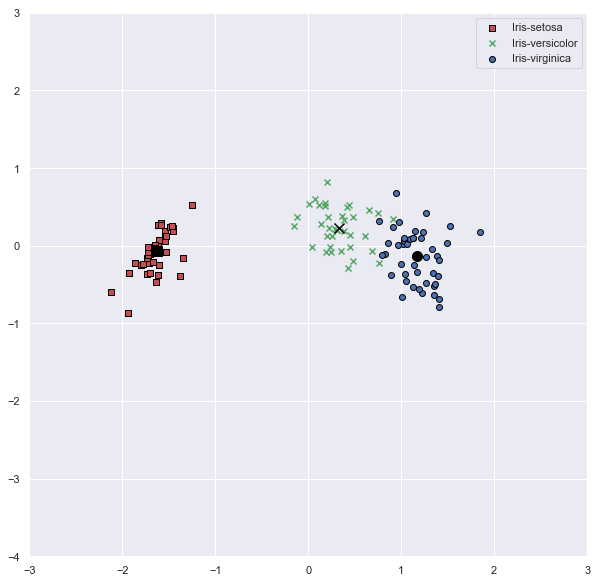

In [17]:


# Plot the data
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.set_xlim(-3,3)
ax0.set_ylim(-4,3)

for l,c,m in zip(np.unique(y_train),['r','g','b'],['s','x','o']):
    ax0.scatter(df2[0][y_train==l],
                df2[1][y_train==l],
               c=c, marker=m, label=l,edgecolors='black')
ax0.legend(loc='upper right')


 
means = []

for m,target in zip(['s','x','o'],np.unique(y_train)):
    means.append(np.mean(df2[y_train==target],axis=0))
    ax0.scatter(np.mean(df2[y_train==target],axis=0)[0],np.mean(df2[y_train==target],axis=0)[1],marker=m,c='black',s=100)
   
mesh_x, mesh_y = np.meshgrid(np.linspace(-3,3),np.linspace(-4,3)) 
mesh = []


for i in range(len(mesh_x)):
    for j in range(len(mesh_x[0])):
        date = [mesh_x[i][j],mesh_y[i][j]]
        mesh.append((mesh_x[i][j],mesh_y[i][j]))


## Drawing boundaries

In [26]:
#Estimating the parameters
mu_list = np.split(dataset[["sepal-length", "sepal-width","Class"]].groupby('Class').mean().values,[1,2])
sigma = dataset[["sepal-length", "sepal-width"]].cov().values
pi_list = dataset[["sepal-length", "sepal-width","Class"]].iloc[:,2].value_counts().values / len(df1)

In [27]:
mu_list

[array([[5.006, 3.418]]), array([[5.936, 2.77 ]]), array([[6.588, 2.974]])]

In [28]:
sigma

array([[ 0.68569351, -0.03926846],
       [-0.03926846,  0.18800403]])

In [29]:
pi_list

array([0.41666667, 0.41666667, 0.41666667])

C:\Users\sudha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


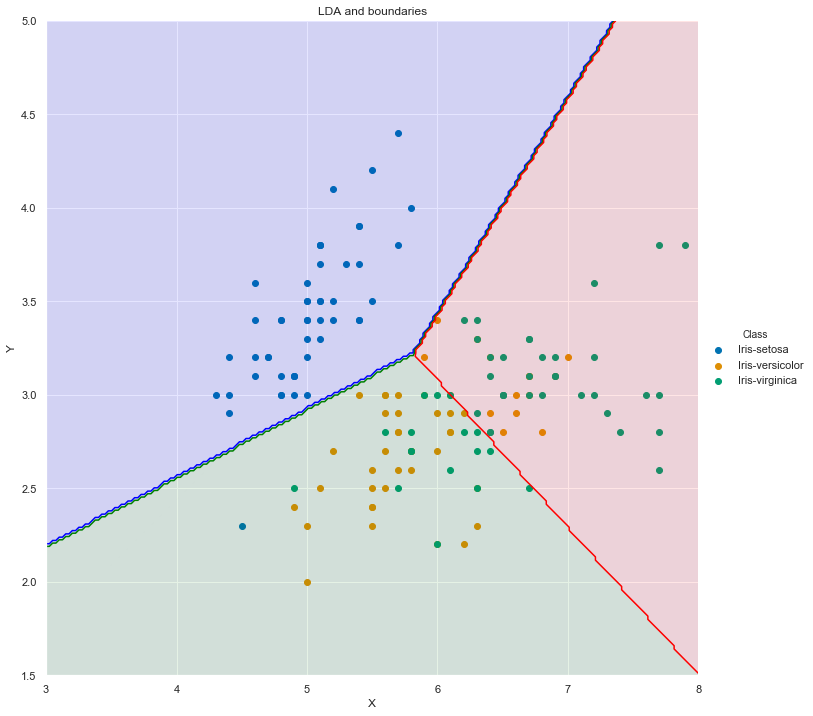

In [30]:
# Our 2-dimensional distribution will be over variables X and Y
N = 200
X = np.linspace(3, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

#Initialize seaborn facetplot
g = sns.FacetGrid(dataset, hue="Class", size=10, palette = 'colorblind') .map(plt.scatter,"sepal-length", "sepal-width", )  .add_legend()
my_ax = g.ax #Retrieving the faceplot axes


#Computing the predicted class function for each value on the grid
zz = np.array(  [predict_LDA_class( np.array([xx,yy]).reshape(-1,1), mu_list, sigma, pi_list) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
    
#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)


#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('X')
my_ax.set_ylabel('Y')
my_ax.set_title('LDA and boundaries')

plt.show()

# Accuracy on train data

In [31]:

df3 = pd.concat([df2, pd.DataFrame(y_train)], axis = 1 )
df3.columns = ['x1', 'x2','species']

df3.head(3)

,x1,x2,species
0,1.023368,0.018600,Iris-virginica
1,0.609384,0.123468,Iris-versicolor
2,-1.699080,-0.101252,Iris-setosa


In [32]:
#Shape training data

#Estimating the parameters
mu_list = np.split(df3.groupby('species').mean().values,[1,2])
Sigma = df3[['x1','x2']].cov().values
pi_list = df3.iloc[:,2].value_counts().values / len(df3) 

X_data = df3.iloc[:,0:3]
y_labels = df3.iloc[:,2].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}).copy()
y_labels

#Classify and compute accuracy  
y_pred = np.array(  [predict_LDA_class( np.array([xx,yy]).reshape(-1,1), mu_list, Sigma, pi_list) 
                     for xx, yy in zip(np.ravel(X_data.values[:,0]), np.ravel(X_data.values[:,1])) ] )
display(np.mean(y_pred == y_labels))

0.925

## Accuracy on test data

In [33]:
# Assuming test data is from same distribution as train Transform the test data with Y=X*w

test= pd.DataFrame(X_test, columns = ['x1','x2','x3','x4'])
test_data = test[['x1','x2','x3','x4']].dot(w)


In [34]:
test_data.head(3)

,0,1
0,1.389010,-0.401174
1,0.166848,0.743448
2,-2.007518,-0.585543


In [35]:
test_label =  pd.DataFrame(y_test).replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}).copy()
test_label

,0
0,2
1,1
2,0
3,2
4,0
5,2
6,0
7,1
8,1
9,1


In [36]:
#Classify and compute accuracy  
y_test_pred = np.array(  [predict_LDA_class( np.array([xx,yy]).reshape(-1,1), mu_list, Sigma, pi_list) 
                     for xx, yy in zip(np.ravel(test_data.values[:,0]), np.ravel(test_data.values[:,1])) ] )


In [37]:
display(np.mean(y_test_pred == test_label[0]))

0.9666666666666667